In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n_page= int(input("페이지 수를 입력하세요: "))

페이지 수를 입력하세요: 5


In [3]:
base_url_naver= "https://finance.naver.com/item/frgn.nhn?code=035720&page={}"

naver_url_list= []
for i in range(n_page):
    naver_url_list.append(base_url_naver.format(i+1))

In [4]:
naver_resp_list= []
for url in naver_url_list:
    naver_resp_list.append(requests.get(url))

In [5]:
naver_soup_list= []
for resp in naver_resp_list:
    naver_soup_list.append(BeautifulSoup(resp.text))

In [6]:
naver_table_list= []
for soup in naver_soup_list:
    for i in range(20): # 한 페이지에 20개의 날짜들이 있음
        naver_table_list.append({
        'date': soup.select('table.type2')[1].select('span')[9*i].text.replace('.','-'),
        'stocks': soup.select('table.type2')[1].select('span')[9*i + 1].text.replace(',',''),
        'ratio': soup.select('table.type2')[1].select('span')[9*i + 3].text.strip().replace('%',''),
        'tradevolume': soup.select('table.type2')[1].select('span')[9*i + 4].text.replace(',',''),
        'agencyvolume': soup.select('table.type2')[1].select('span')[9*i + 5].text.replace(',',''),
        'foreignvolume': soup.select('table.type2')[1].select('span')[9*i + 6].text.replace(',',''),
        'foreignratio': soup.select('table.type2')[1].select('span')[9*i + 8].text.replace('%','')
    })

In [7]:
naver_final_list= naver_table_list.copy()
naver_final_list.reverse()

In [8]:
naver_final_list

[{'date': '2020-03-04',
  'stocks': '179500',
  'ratio': '+2.57',
  'tradevolume': '709188',
  'agencyvolume': '-25003',
  'foreignvolume': '+72673',
  'foreignratio': '32.37'},
 {'date': '2020-03-05',
  'stocks': '179500',
  'ratio': '0.00',
  'tradevolume': '821744',
  'agencyvolume': '-71756',
  'foreignvolume': '-197315',
  'foreignratio': '32.14'},
 {'date': '2020-03-06',
  'stocks': '175500',
  'ratio': '-2.23',
  'tradevolume': '568424',
  'agencyvolume': '-76940',
  'foreignvolume': '-2861',
  'foreignratio': '32.18'},
 {'date': '2020-03-09',
  'stocks': '167500',
  'ratio': '-4.56',
  'tradevolume': '805638',
  'agencyvolume': '-18569',
  'foreignvolume': '-112485',
  'foreignratio': '32.06'},
 {'date': '2020-03-10',
  'stocks': '173000',
  'ratio': '+3.28',
  'tradevolume': '950875',
  'agencyvolume': '+200052',
  'foreignvolume': '+8543',
  'foreignratio': '32.05'},
 {'date': '2020-03-11',
  'stocks': '169000',
  'ratio': '-2.31',
  'tradevolume': '550227',
  'agencyvolume':

In [9]:
naver_final= pd.DataFrame(naver_final_list)

# type 변환하기

In [10]:
naver_final.date= naver_final.date.astype('datetime64')
naver_final.stocks= naver_final.stocks.astype('int')
naver_final.ratio= naver_final.ratio.astype('float')
naver_final.tradevolume= naver_final.tradevolume.astype('int')
naver_final.agencyvolume= naver_final.agencyvolume.astype('int')
naver_final.foreignvolume= naver_final.foreignvolume.astype('int')
naver_final.foreignratio= naver_final.foreignratio.astype('float')

In [11]:
naver_final.dtypes

date             datetime64[ns]
stocks                    int32
ratio                   float64
tradevolume               int32
agencyvolume              int32
foreignvolume             int32
foreignratio            float64
dtype: object

In [12]:
naver_final

,date,stocks,ratio,tradevolume,agencyvolume,foreignvolume,foreignratio
0,2020-03-04,179500,2.57,709188,-25003,72673,32.37
1,2020-03-05,179500,0.00,821744,-71756,-197315,32.14
2,2020-03-06,175500,-2.23,568424,-76940,-2861,32.18
3,2020-03-09,167500,-4.56,805638,-18569,-112485,32.06
4,2020-03-10,173000,3.28,950875,200052,8543,32.05
...,...,...,...,...,...,...,...
95,2020-07-21,316000,1.94,1676630,1319,-204265,32.95
96,2020-07-22,318000,0.63,1159298,-3053,-39041,32.90
97,2020-07-23,329500,3.62,1260435,29294,104215,33.02
98,2020-07-24,324500,-1.52,907643,-38444,-23929,33.05


In [13]:
naver_final.to_csv("dataset/Naver_Stocks.csv")

In [14]:
naver_final.iloc[:,:2]

,date,stocks
0,2020-03-04,179500
1,2020-03-05,179500
2,2020-03-06,175500
3,2020-03-09,167500
4,2020-03-10,173000
...,...,...
95,2020-07-21,316000
96,2020-07-22,318000
97,2020-07-23,329500
98,2020-07-24,324500


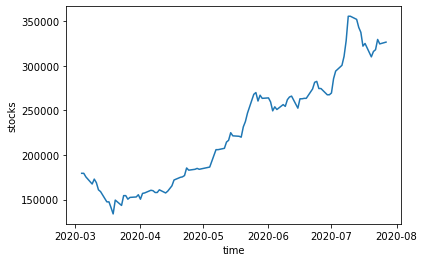

In [15]:
plt.plot(naver_final.iloc[:,0], naver_final.iloc[:,1])
plt.xlabel("time")
plt.ylabel("stocks")
plt.show()

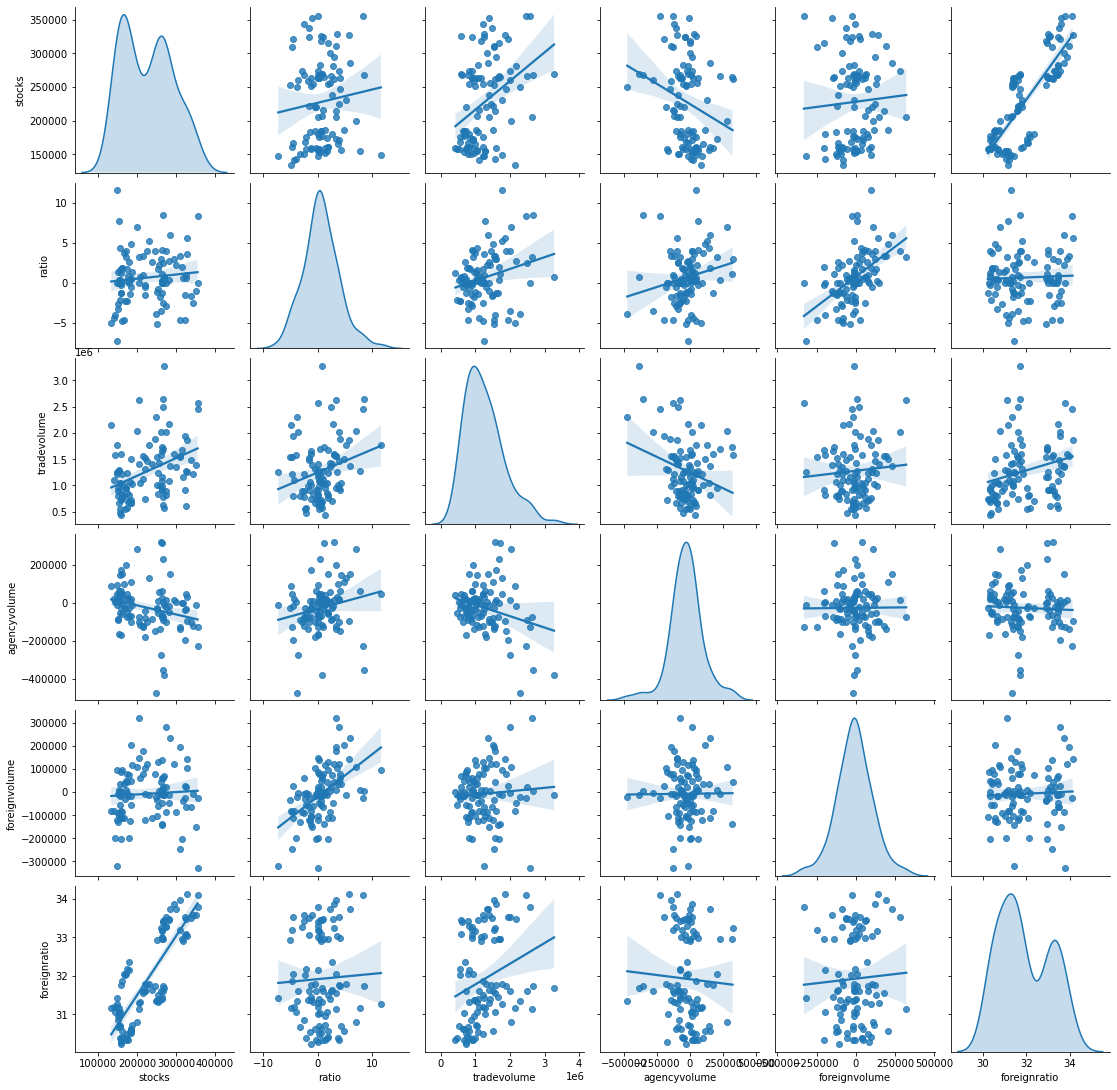

In [16]:
sns.pairplot(naver_final, kind= 'reg', diag_kind= 'kde')

# 앞으로 할 일
- 상관계수 구하고 상관관계 관찰하기
    - LinearRegression으로 변인 간 선형관계 파악하기
- 시계열분석으로 추세 파악하기
    - ARIMA model
    - LOWESS curve
- LSTM / Recurrence Plot으로 딥러닝 기법 적용해보기